# Machine Learning Model using Neural Network


In [9]:
#Call Library
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix


In [10]:
#Call Dataset
data = pd.read_csv("Data_training.csv", delimiter=',')
data

,RMS1,SSI1,MAV1,IEMG1,PKF1,MNP1,RMS2,SSI2,MAV2,IEMG2,...,SSI3,MAV3,IEMG3,PKF3,MNP3,BMI,BF,FFM,OR,DOMS
0,0.140183,66.126996,0.094038,316.4380172,98.632812,764.113883,0.230391,178.454251,0.166771,560.685657,...,252.319595,0.213255,660.665117,47.851562,1439.894484,26.45,20.37,64.5,1,1
1,0.165638,110.238253,0.109068,438.2360214,113.769531,815.390316,0.209526,150.273895,0.158326,541.948709,...,107.358808,0.117995,478.234526,78.613281,724.714243,26.45,20.37,64.5,1,1
2,0.169898,103.193039,0.109656,392.0207778,19.042969,793.503828,0.261797,261.265206,0.188779,719.625686,...,467.641006,0.276446,934.111800,79.589844,1412.205261,26.45,20.37,64.5,1,1
3,0.141682,86.397151,0.093013,400.3272018,126.220703,1817.091765,0.232483,222.571131,0.173143,713.001302,...,591.568116,0.299868,1114.310622,77.148438,1194.683656,26.45,20.37,64.5,1,1
4,0.164843,91.600519,0.107669,362.9522726,140.136719,936.011274,0.177793,97.897332,0.130260,403.416318,...,105.382138,0.110829,472.351795,140.136719,2157.931252,26.45,20.37,64.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.220443,200.066393,0.159435,656.3934984,71.533203,2126.994761,0.364039,498.821935,0.276145,1039.409232,...,371.058706,0.241056,908.057718,22.460938,847.072742,17.99,9.99,46.8,0,1
100,0.188068,179.040256,0.132626,671.3512455,42.724609,1497.221645,0.261008,317.873308,0.189106,882.368171,...,277.678856,0.173695,797.086146,54.199219,2109.974362,17.99,9.99,46.8,0,0
101,0.206763,173.312210,0.145733,590.8014312,61.035156,605.987037,0.279763,284.736404,0.203516,740.389766,...,271.844755,0.196269,735.615732,22.949219,847.639157,17.99,9.99,46.8,0,0
102,0.229474,229.115567,0.161376,702.1464208,80.322266,2037.676449,0.302918,353.364673,0.228296,879.166753,...,278.008749,0.199205,776.303044,80.566406,773.630889,17.99,9.99,46.8,0,0


In [11]:
# Handle missing or non-numeric values
data = data.replace(',', '', regex=True)  # Remove commas from numeric values
data = data.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN

# Check for null value
data.isnull().sum().sort_values(ascending=False)


RMS1     0
RMS3     0
OR       0
FFM      0
BF       0
BMI      0
MNP3     0
PKF3     0
IEMG3    0
MAV3     0
SSI3     0
MNP2     0
SSI1     0
PKF2     0
IEMG2    0
MAV2     0
SSI2     0
RMS2     0
MNP1     0
PKF1     0
IEMG1    0
MAV1     0
DOMS     0
dtype: int64

## Scaling

In [12]:
scale_columns = ['RMS1', 'SSI1', 'MAV1', 'IEMG1', 'PKF1', 'MNP1','RMS2', 'SSI2', 'MAV2', 'IEMG2', 'PKF2', 'MNP2', 'RMS3', 'SSI3', 'MAV3', 'IEMG3', 'PKF3', 'MNP3','BMI','BF','FFM']
standardScaler = StandardScaler()
data[scale_columns] = standardScaler.fit_transform(data[scale_columns])

# Display the updated DataFrame
print(data.head())

       RMS1      SSI1      MAV1     IEMG1      PKF1      MNP1      RMS2  \
0 -0.966109 -0.973316 -0.939295 -1.253601  0.811202 -0.933378 -0.892981   
1 -0.650117 -0.680738 -0.680521 -0.710220  1.451819 -0.865912 -1.123034   
2 -0.597245 -0.727467 -0.670398 -0.916402 -2.557200 -0.894709 -0.546691   
3 -0.947512 -0.838869 -0.956946 -0.879344  1.978778  0.452055 -0.869909   
4 -0.659996 -0.804357 -0.704610 -1.046086  2.567732 -0.707208 -1.472928   

       SSI2      MAV2     IEMG2  ...      SSI3      MAV3     IEMG3      PKF3  \
0 -0.926295 -0.958670 -1.221412  ...  0.035284  0.600414 -0.074135 -1.018766   
1 -1.052644 -1.080356 -1.297526  ... -0.912097 -1.080502 -0.968508  0.095491   
2 -0.555004 -0.641587 -0.575766  ...  1.442503  1.715451  1.266449  0.130864   
3 -0.728492 -0.866875 -0.602675  ...  2.252421  2.128746  2.149880  0.042431   
4 -1.287480 -1.484718 -1.860272  ... -0.925016 -1.206959 -0.997348  2.324003   

       MNP3       BMI        BF       FFM  OR  DOMS  
0  0.170050  1

In [13]:
standardScaler.mean_

array([2.18009029e-01, 2.12871335e+02, 1.48594221e-01, 5.97430826e+02,
       7.94654259e+01, 1.47351408e+03, 3.11378197e-01, 3.85050484e+02,
       2.33309268e-01, 8.61362964e+02, 6.82443472e+01, 1.20961174e+03,
       2.45335118e-01, 2.46920678e+02, 1.79228948e-01, 6.75786805e+02,
       7.59770320e+01, 1.30677614e+03, 2.17800000e+01, 1.48184615e+01,
       5.48823077e+01])

In [14]:
standardScaler.scale_

array([8.05556134e-02, 1.50767416e+02, 5.80820397e-02, 2.24148482e+02,
       2.36283624e+01, 7.60035040e+02, 9.06935858e-02, 2.23035099e+02,
       6.94063728e-02, 2.46171824e+02, 2.30767773e+01, 6.46522083e+02,
       7.81570882e-02, 1.53012020e+02, 5.66715594e-02, 2.03975904e+02,
       2.76073988e+01, 7.82818465e+02, 3.84372015e+00, 4.67666358e+00,
       7.80571206e+00])

## Feature Selection by Choosing top 10 Related Features

In [5]:
corr_data = data.corr()
corr_data

,RMS1,SSI1,MAV1,IEMG1,PKF1,MNP1,RMS2,SSI2,MAV2,IEMG2,...,SSI3,MAV3,IEMG3,PKF3,MNP3,BMI,BF,FFM,OR,DOMS
RMS1,1.000000,0.959822,0.981546,0.851490,0.144924,0.445743,0.703571,0.710581,0.700227,0.703185,...,0.484672,0.480106,0.510231,0.227234,0.123463,0.237910,0.240754,0.309830,0.060703,-0.277069
SSI1,0.959822,1.000000,0.950999,0.930663,0.133491,0.481879,0.659170,0.691329,0.659591,0.691987,...,0.511040,0.500253,0.560730,0.238939,0.115199,0.258309,0.261420,0.325753,0.070883,-0.270720
MAV1,0.981546,0.950999,1.000000,0.870904,0.144550,0.427744,0.631809,0.641012,0.640087,0.653752,...,0.419960,0.424967,0.475945,0.192996,0.104391,0.195164,0.201025,0.264825,-0.013983,-0.274923
IEMG1,0.851490,0.930663,0.870904,1.000000,0.078877,0.545040,0.513588,0.550722,0.515225,0.605784,...,0.471676,0.459661,0.581502,0.167540,0.130029,0.080248,0.084041,0.115271,-0.076003,-0.348325
PKF1,0.144924,0.133491,0.144550,0.078877,1.000000,0.105677,0.099902,0.106706,0.108125,0.085502,...,0.138572,0.154859,0.122573,0.382029,0.044694,0.270556,0.268997,0.290737,0.164708,-0.094738
MNP1,0.445743,0.481879,0.427744,0.545040,0.105677,1.000000,0.201000,0.241519,0.181350,0.307184,...,0.348270,0.299809,0.442674,0.007104,0.396854,-0.056977,-0.053599,-0.060512,-0.244128,-0.034960
RMS2,0.703571,0.659170,0.631809,0.513588,0.099902,0.201000,1.000000,0.976069,0.994056,0.921758,...,0.489089,0.480149,0.415023,0.233349,0.003196,0.270631,0.260613,0.306957,0.266748,-0.191051
SSI2,0.710581,0.691329,0.641012,0.550722,0.106706,0.241519,0.976069,1.000000,0.971230,0.955643,...,0.532756,0.500982,0.484439,0.270085,0.055694,0.304453,0.295244,0.339419,0.257001,-0.159874
MAV2,0.700227,0.659591,0.640087,0.515225,0.108125,0.181350,0.994056,0.971230,1.000000,0.927438,...,0.428789,0.424341,0.366721,0.228321,-0.024913,0.290551,0.281300,0.320575,0.249701,-0.196807
IEMG2,0.703185,0.691987,0.653752,0.605784,0.085502,0.307184,0.921758,0.955643,0.927438,1.000000,...,0.474322,0.432208,0.488702,0.254087,0.100243,0.241477,0.233484,0.263473,0.133683,-0.161081


In [6]:
strong_relation_features = pd.Series(abs(corr_data['DOMS'])).nlargest(n=25).iloc[1:] #nlargest(n=7)==> take 6 features
strong_relation_features

IEMG1    0.348325
RMS1     0.277069
MAV1     0.274923
SSI1     0.270720
PKF2     0.236499
MAV2     0.196807
RMS2     0.191051
OR       0.187120
PKF3     0.179319
IEMG2    0.161081
SSI2     0.159874
MNP2     0.115370
FFM      0.105532
PKF1     0.094738
BF       0.078376
BMI      0.067726
RMS3     0.058445
MNP3     0.044388
MAV3     0.043366
MNP1     0.034960
SSI3     0.034932
IEMG3    0.000841
Name: DOMS, dtype: float64

In [ ]:
data = data.drop(['PKF1','MNP1','SSI2','MNP2','RMS3','SSI3','MAV3','IEMG3','MNP3','BMI','BF','FFM'], axis=1)
data

,RMS1,SSI1,MAV1,IEMG1,RMS2,MAV2,IEMG2,PKF2,PKF3,OR,DOMS
0,-0.966109,-0.973316,-0.939295,-1.253601,-0.892981,-0.958670,-1.221412,1.951611,-1.018766,1,1
1,-0.650117,-0.680738,-0.680521,-0.710220,-1.123034,-1.080356,-1.297526,0.597436,0.095491,1,1
2,-0.597245,-0.727467,-0.670398,-0.916402,-0.546691,-0.641587,-0.575766,0.428164,0.130864,1,1
3,-0.947512,-0.838869,-0.956946,-0.879344,-0.869909,-0.866875,-0.602675,0.544539,0.042431,1,1
4,-0.659996,-0.804357,-0.704610,-1.046086,-1.472928,-1.484718,-1.860272,1.464955,2.324003,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99,0.030217,-0.084932,0.186644,0.263052,0.580645,0.617171,0.723260,-1.983960,-1.938469,0,1
100,-0.371685,-0.224393,-0.274930,0.329783,-0.555383,-0.636878,0.085327,-0.111390,-0.788840,0,0
101,-0.139607,-0.262385,-0.049262,-0.029576,-0.348595,-0.429264,-0.491418,-1.941642,-1.920783,0,0
102,0.142319,0.107744,0.220062,0.467171,-0.093286,-0.072235,0.072323,-2.005119,0.166237,0,0


## Training Model

In [ ]:
#Split Features and Label
Y = data['DOMS']
X = data.drop(['DOMS'], axis = 1)


In [ ]:
# #Shuffling Features and Label
X,Y=shuffle(X,Y)

In [ ]:
#Splitting into data training and data testing
x_training, x_testing, y_training, y_testing = train_test_split(X, Y, test_size = 0.2, random_state =42)

In [ ]:
#ANN Setting
def get_basic_model():
  model = tf.keras.Sequential([
  tf.keras.layers.Dense(32, activation='sigmoid',name="Hidden_1"),
  tf.keras.layers.Dense(16, activation='sigmoid',name="Hidden_2"),
  tf.keras.layers.Dense(8, activation='sigmoid',name="Hidden_3"),
  tf.keras.layers.Dense(1, activation='linear',name="Output")
  ],
  name="Sequential")
  # model.summary()

  model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])
  
  return model

#Checkpoint to save the best accuracy
checkpoint_filepath = "C:/Users/Nathaniel Win/Python Project/Program TA/Checkpoint/checkpoint"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
#Training Model
model = get_basic_model()
model.fit(X,Y, epochs=200, batch_size=2,callbacks=model_checkpoint_callback)
model.summary()

Epoch 1/200


52/52 [==============================] - 1s 2ms/step - loss: 0.3883 - accuracy: 0.6538
Epoch 2/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2300 - accuracy: 0.6538
Epoch 3/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2251 - accuracy: 0.6538
Epoch 4/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2224 - accuracy: 0.6538
Epoch 5/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.6538
Epoch 6/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2184 - accuracy: 0.6538
Epoch 7/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2155 - accuracy: 0.6538
Epoch 8/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2144 - accuracy: 0.6538
Epoch 9/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2136 - accuracy: 0.6538
Epoch 10/200
52/52 [==============================] - 0s 1ms/step - loss: 0.2117 - accuracy: 0.6538
Epoch 11/200
52/52 [=

In [ ]:
model.load_weights(checkpoint_filepath) #To load the checkpoint
print(model.layers[0].weights) #Print Weight and Bias in Hidden Layer 1
print(model.layers[1].weights) #Print Weight and Bias in Hidden Layer 2
print(model.layers[2].weights) #Print Weight and Bias in Hidden Layer 3
print(model.layers[3].weights) #Print Weight and Bias in Output Layer 

[<tf.Variable 'Hidden_1/kernel:0' shape=(10, 32) dtype=float32, numpy=
array([[-0.2285973 , -0.97627443, -0.08891128, -0.17807364, -0.12901257,
        -0.2690783 , -0.01932449,  0.05815076,  0.17026308,  0.2821976 ,
         0.18446629,  0.08340639, -0.30858037,  0.44668794,  0.07739967,
         0.23778972,  0.43745106,  0.12934513,  0.22616577, -0.4723527 ,
        -0.47752473,  0.316116  , -0.27305385,  0.12640055, -0.45543265,
        -0.81477755,  0.16567124, -0.19201829,  0.16392417, -1.2638537 ,
        -0.10067295, -0.24187948],
       [ 0.55462486, -0.4791938 , -0.20092316, -0.27753964, -0.49277705,
        -0.39732373,  0.68995506,  0.312638  , -0.00525329, -0.06928213,
        -0.48021927, -0.30327755, -0.3769691 ,  0.6740001 ,  0.019229  ,
         0.5368286 ,  0.12702236, -0.5952144 , -0.24332395, -0.68378896,
        -0.6810875 , -0.09840272, -0.68652606,  0.5579943 ,  0.32499123,
        -0.7613076 ,  0.1466802 , -0.6085029 ,  0.5135661 , -0.9687356 ,
         0.1385950

## Testing Model

In [ ]:
test_loss, test_acc = model.evaluate(x_testing,  y_testing, verbose=1)

print(f'Test accuracy: {test_acc * 100} %')
print(f'Test loss: {test_loss * 100} %')

1/1 [==============================] - 0s 125ms/step - loss: 0.0879 - accuracy: 0.9048
Test accuracy: 90.47619104385376 %
Test loss: 8.789869397878647 %


In [ ]:
x_testing.shape

(21, 10)

In [ ]:
#Prediction using data test
prediction = model.predict(x_testing)
prediction

1/1 [==============================] - 0s 89ms/step


array([[ 0.20422558],
       [-0.03453374],
       [ 0.31187597],
       [ 0.4830605 ],
       [-0.18003514],
       [ 1.3187114 ],
       [ 0.52955365],
       [ 0.0400628 ],
       [-0.2819092 ],
       [ 0.43766892],
       [ 0.7123685 ],
       [ 0.9549445 ],
       [ 0.15833265],
       [ 0.08556917],
       [ 0.21459647],
       [ 0.23898496],
       [ 0.3701107 ],
       [-0.03123231],
       [ 0.75205004],
       [ 0.67664456],
       [ 0.4891229 ]], dtype=float32)

In [ ]:
# Change the result of prediction into binary
for i in range(len(prediction)):
    if prediction[i] >= 0.5:
      prediction[i]=1
    else: prediction[i]=0
    print(prediction[i])

[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[1.]
[0.]
[0.]
[0.]
[1.]
[1.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[1.]
[1.]
[0.]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.83      0.83      0.83         6

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21



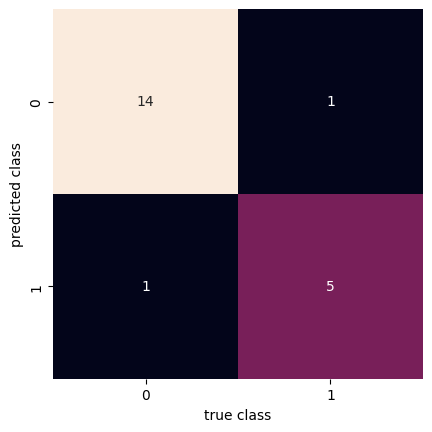

In [ ]:
#Confussion Matrix
conmat=confusion_matrix(y_testing,prediction)
sns.heatmap(conmat.T, square=True, annot=True, fmt='d', cbar=False) 
plt.xlabel('true class') 
plt.ylabel('predicted class')
print(classification_report(y_testing,prediction))

In [ ]:
# Call Dataset
test = pd.read_csv("Data_training.csv", delimiter=',')
test

# Handle missing or non-numeric values
test = test.replace(',', '', regex=True)  # Remove commas from numeric values
test = test.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric values to NaN

# Check for null value
test.isnull().sum().sort_values(ascending=False)

# Remove rows with NaN values
test = test.dropna()

# Print the resulting testframe
test

# Scaling
scale_columns = ['RMS1', 'SSI1','MAV1', 'IEMG1','RMS2', 'MAV2','IEMG2','PKF2','PKF3','OR']
standardScaler = StandardScaler()
test[scale_columns] = standardScaler.fit_transform(test[scale_columns])

# Display the updated testFrame
print(test.head())

       RMS1      SSI1      MAV1     IEMG1        PKF1         MNP1      RMS2  \
0 -0.966109 -0.973316 -0.939295 -1.253601   98.632812   764.113883 -0.892981   
1 -0.650117 -0.680738 -0.680521 -0.710220  113.769531   815.390316 -1.123034   
2 -0.597245 -0.727467 -0.670398 -0.916402   19.042969   793.503828 -0.546691   
3 -0.947512 -0.838869 -0.956946 -0.879344  126.220703  1817.091765 -0.869909   
4 -0.659996 -0.804357 -0.704610 -1.046086  140.136719   936.011274 -1.472928   

         SSI2      MAV2     IEMG2  ...        SSI3      MAV3        IEMG3  \
0  178.454251 -0.958670 -1.221412  ...  252.319595  0.213255   660.665117   
1  150.273895 -1.080356 -1.297526  ...  107.358808  0.117995   478.234526   
2  261.265206 -0.641587 -0.575766  ...  467.641006  0.276446   934.111800   
3  222.571131 -0.866875 -0.602675  ...  591.568116  0.299868  1114.310622   
4   97.897332 -1.484718 -1.860272  ...  105.382138  0.110829   472.351795   

       PKF3         MNP3    BMI     BF   FFM        OR  

In [ ]:
Y = data['DOMS']
X = data.drop(['DOMS'], axis=1)

4/4 [==============================] - 0s 0s/step - loss: 0.0670 - accuracy: 0.9423
Test Accuracy: 94.2307710647583 %
Test Loss: 6.702828407287598 %
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        68
           1       0.92      0.92      0.92        36

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



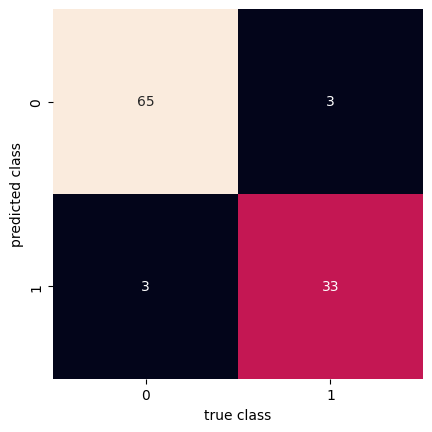

In [ ]:
predictions = model.predict(X)

# Convert predictions to binary
predictions_binary = np.where(predictions >= 0.5, 1, 0)

# Evaluate the performance
test_loss, test_acc = model.evaluate(X, Y, verbose=1)
print(f'Test Accuracy: {test_acc * 100} %')
print(f'Test Loss: {test_loss * 100} %')

# Confusion Matrix
conmat = confusion_matrix(Y, predictions_binary)
sns.heatmap(conmat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true class')
plt.ylabel('predicted class')
print(classification_report(Y, predictions_binary))